In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.applications import VGG16
from keras.applications import ResNet50
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.font_manager as fm
from keras.models import load_model

Using TensorFlow backend.


In [2]:
pre_trained_model = VGG16()

In [3]:
width = 150
height = 150

In [4]:
train_dir = "/Users/joannakang/Desktop/190920/RSP/train"
test_dir = "/Users/joannakang/Desktop/190920/RSP/test"

In [5]:
class_name = os.listdir(train_dir)
print (class_name)

['paper', 'rock', 'scissors']


In [37]:
#input = 이미지 (독립변수), label = 텍스트 결과값 (종속변수)
train_input = []
train_label = []

In [7]:
test_input = []
test_label = []

In [8]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/Users/joannakang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
for i in range(len(class_name)):
    path = os.path.join(train_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 3))
        train_input.append(img)
        train_label.append(onehot_encoded[i])

In [10]:
for i in range(len(class_name)):
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 3))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [11]:
path = os.path.join(train_dir, class_name[0])
img_list = os.listdir(path)
print (img_list)

['IMG_20190913_192935.jpg', 'KakaoTalk_Photo_2019-09-13-19-47-31.jpeg', 'IMG_20190913_192927.jpg', 'IMG_20190913_192933.jpg', 'IMG_20190913_192932.jpg', 'IMG_20190913_192919.jpg', 'IMG_20190913_192925.jpg', 'IMG_20190913_192931.jpg', 'KakaoTalk_Photo_2019-09-13-19-47-40.jpeg', 'KakaoTalk_Photo_2019-09-13-19-49-25.jpeg', 'IMG_9727.jpg', 'IMG_9726.jpg', 'IMG_9730.jpg', 'IMG_9728.jpg', 'IMG_9729.jpg', 'KakaoTalk_Photo_2019-09-13-19-46-23.jpeg', '4.jpg', 'KakaoTalk_Photo_2019-09-13-19-45-02.jpeg', 'IMG_20190913_192929.jpg', '5.jpg', '7.jpg', '6.jpg', '2.jpg', 'KakaoTalk_Photo_2019-09-13-19-46-33.jpeg', 'KakaoTalk_Photo_2019-09-13-19-48-40.jpeg', '3.jpg', '1.jpg', 'KakaoTalk_Photo_2019-09-13-19-44-38.jpeg', 'KakaoTalk_Photo_2019-09-13-19-45-15.jpeg']


In [12]:
print(len((train_input)))
print(len(train_label))
print(len((test_input)))
print(len((test_label)))

85
85
15
15


In [13]:
train_input, val_input, train_label, val_label = train_test_split(train_input, train_label, test_size=0.2, random_state=32)

In [14]:
print(len(train_input))
print(len(val_input))
print(len(test_input))

68
17
15


In [15]:
train_input = np.array(train_input)
train_label = np.array(train_label)
val_input = np.array(val_input)
val_label = np.array(val_label)
test_input = np.array(test_input)
test_label = np.array(test_label)

In [16]:
print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

(68, 150, 150, 3)
(17, 150, 150, 3)
(15, 150, 150, 3)


In [17]:
pre_trained_model = VGG16()

In [18]:
pre_trained_model.summary()
#trainable parameter = 파라미터 안에 가중치가 없다
#non-trainable parameter : 이미 모델 안에 가중치가 설정되어있다.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
#가중치를 고정시키겠다는 뜻
pre_trained_model.trainable = False

In [24]:
pre_trained_model = VGG16(include_top = False, input_shape = (150, 150, 3))

In [25]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [26]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
#마지막 라인의 Dense(N) / N=은 구분하고자 하는 갯수와 같아야 함

In [27]:
model.summary()
#vgg16  = 다른 모델에서 가져온 구조
#dense_1~4 = 새로 붙인 top 부분

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                163860    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 14,878,845
Trainable params: 14,878,845
Non-trainable params: 0
__________________________________________

In [28]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(x = train_input, y = train_label, validation_data = (val_input, val_label), batch_size = 5, epochs = 10)

Train on 68 samples, validate on 17 samples
Epoch 1/10
68/68 [==============================] - 28s 414ms/step - loss: 185.0522 - accuracy: 0.4265 - val_loss: 1.3181 - val_accuracy: 0.4118
Epoch 2/10
68/68 [==============================] - 27s 398ms/step - loss: 1.4344 - accuracy: 0.2941 - val_loss: 1.1037 - val_accuracy: 0.1176
Epoch 3/10
68/68 [==============================] - 25s 371ms/step - loss: 1.1353 - accuracy: 0.3529 - val_loss: 1.0940 - val_accuracy: 0.2941
Epoch 4/10
68/68 [==============================] - 26s 381ms/step - loss: 1.3078 - accuracy: 0.4118 - val_loss: 1.3634 - val_accuracy: 0.3529
Epoch 5/10
68/68 [==============================] - 25s 370ms/step - loss: 1.3593 - accuracy: 0.3088 - val_loss: 1.1498 - val_accuracy: 0.3529
Epoch 6/10
68/68 [==============================] - 25s 369ms/step - loss: 1.1111 - accuracy: 0.3235 - val_loss: 1.1314 - val_accuracy: 0.1176
Epoch 7/10
68/68 [==============================] - 25s 370ms/step - loss: 1.1276 - accuracy: 0.

In [30]:
result = model.predict(test_input)

In [31]:
test_real_label = []
test_predicted_label = []

In [32]:
for i in range(len(test_label)):
    if str(np.argmax(test_label[i])) == '0':
        test_real_label.append('보')
    elif str(np.argmax(test_label[i])) == '1':
        test_real_label.append('바위')
    else:
        test_real_label.append('가위')

In [33]:
for i in range(len(result)):
    if str(np.argmax(result[i])) == '1':
        test_predicted_label.append('바위')
    elif str(np.argmax(result[i])) == '0':
        test_predicted_label.append('보')
    else:
        test_predicted_label.append('가위')

In [34]:
on_gothic = '/Users/joannakang/Desktop/Font/나눔손글씨 암스테르담.ttf'
fontprop1 = fm.FontProperties(fname=on_gothic, size=13)

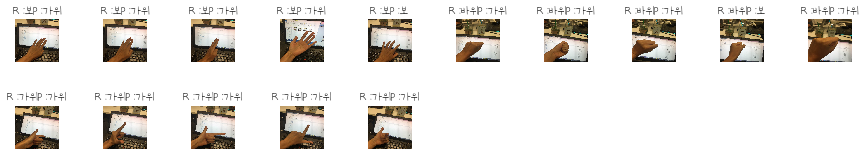

In [35]:
plt.figure(figsize=(15, 15))

for i in range(len(test_input)):
    plt.subplot(3, 10, i + 1)
    plt.axis('off')
    plt.imshow(test_input[i])
    plt.title('R :' + test_real_label[i] + 'P :' + test_predicted_label[i], fontproperties = fontprop1)
    plt.subplots_adjust(top = 1, bottom= 0.8, hspace= 1, wspace= 1)
plt.show()

In [36]:
print(len(test_input))

15
